# Exercicis d'algoritmes d'Agrupació.
# Ejercicios de Algoritmos de Agrupación.
# Clustering Algorithms Exercises.

- Exercici 1

Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

Important

Tingues en compte que prèviament et caldrà preparar el dataset.

- Ejercicio 1

Descarga el conjunto de datos adjunto, que contiene registros de publicaciones en Facebook sobre Tailandia, y clasifica los diferentes registros utilizando el algoritmo de K-means.

Importante:

Ten en cuenta que necesitarás preparar previamente el conjunto de datos.

- Exercise 1

Download the attached dataset, containing records of Facebook posts about Thailand, and classify the different records using the K-means algorithm.

Important:

Keep in mind that you will need to prepare the dataset beforehand.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/DS/S8. Algoritmes d’aprenentatge NO supervisat Agrupació/M8T01/Publicacions Facebook Thailandia.csv', sep=',')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [ ]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [4]:
df = df.drop(['Column1', 'Column2', 'Column3', 'Column4'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [ ]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [ ]:
df.nunique()

status_id           6997
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
dtype: int64

In [ ]:
# Encuentra las filas completamente duplicadas
duplicated_rows = df[df.duplicated(keep=False)]

# Imprime las filas completamente duplicadas
print(duplicated_rows)

                             status_id status_type status_published  \
6170  819700534875473_1002372733274918       video   6/10/2018 3:43   
6171  819700534875473_1001982519980606       photo   6/9/2018 22:53   
6172  819700534875473_1000607730118085       photo    6/7/2018 7:01   
6173   819700534875473_999880033524188      status    6/6/2018 2:20   
6174   819700534875473_998824716963053       photo    6/4/2018 6:57   
...                                ...         ...              ...   
6267   819700534875473_955743124604546       photo   3/22/2018 3:48   
6268   819700534875473_955149101330615       photo   3/21/2018 1:15   
6269   819700534875473_954387151406810       photo   3/20/2018 1:54   
6270   819700534875473_953048221540703       photo   3/18/2018 4:28   
6271   819700534875473_951614605017398       photo   3/16/2018 1:57   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
6170            376            20           3        354         1

In [42]:
# Encuentra las filas duplicadas basadas en 'status_id' y 'status_published'
duplicated_entries = df[df.duplicated(subset=['status_id', 'status_published'], keep=False)]

# Imprime las filas duplicadas que coinciden en 'status_id' y 'status_published'
print(duplicated_entries[['status_id', 'status_published']])

                             status_id status_published
6170  819700534875473_1002372733274918   6/10/2018 3:43
6171  819700534875473_1001982519980606   6/9/2018 22:53
6172  819700534875473_1000607730118085    6/7/2018 7:01
6173   819700534875473_999880033524188    6/6/2018 2:20
6174   819700534875473_998824716963053    6/4/2018 6:57
...                                ...              ...
6267   819700534875473_955743124604546   3/22/2018 3:48
6268   819700534875473_955149101330615   3/21/2018 1:15
6269   819700534875473_954387151406810   3/20/2018 1:54
6270   819700534875473_953048221540703   3/18/2018 4:28
6271   819700534875473_951614605017398   3/16/2018 1:57

[102 rows x 2 columns]


In [ ]:
df[df.status_id == '819700534875473_1002372733274918']

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
6170,819700534875473_1002372733274918,video,6/10/2018 3:43,376,20,3,354,19,3,0,0,0
6221,819700534875473_1002372733274918,video,6/10/2018 3:43,376,20,3,354,19,3,0,0,0


In [ ]:
df[df.status_id == '819700534875473_1001982519980606']

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
6171,819700534875473_1001982519980606,photo,6/9/2018 22:53,255,7,4,249,6,0,0,0,0
6222,819700534875473_1001982519980606,photo,6/9/2018 22:53,255,7,4,249,6,0,0,0,0


In [ ]:
df[df.status_id == '819700534875473_999880033524188']

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
6173,819700534875473_999880033524188,status,6/6/2018 2:20,205,39,4,197,4,4,0,0,0
6224,819700534875473_999880033524188,status,6/6/2018 2:20,205,39,4,197,4,4,0,0,0


S'assumeix que les files duplicades coincideixen amb les que són duplicades amb status_id i status_published. Es procedeix a eliminar-les i també es conserven les dades originals.

Se asume que las filas duplicadas coinciden con las que son duplicadas con status_id y status_published. Se eliminan y tambien se conservan los datos originales.

It is assumed that duplicated rows coincide with those duplicated with status_id and status_published. They are removed, and the original data is also retained.

In [5]:
df.drop_duplicates(keep='first', inplace=True)

In [5]:
df[df.status_id == '819700534875473_999880033524188']

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
6173,819700534875473_999880033524188,status,6/6/2018 2:20,205,39,4,197,4,4,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


s'esborren les variables categòriques que no seran predictores i no influeixen en el conjunt de dades.

Se eliminan las variables categóricas que no van a ser predictoras y no inlfuyen en el data set

Categorical variables that are not going to be predictors and do not influence the dataset are removed.

In [6]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [ ]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [7]:
from sklearn.preprocessing import LabelEncoder

X = df
y = df['status_type']
le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

In [34]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
cols = X.columns

# Escalar los datos con StandardScaler
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)
dfX_standard = pd.DataFrame(X_standard, columns=[cols])

# Escalar los datos con RobustScaler
scaler_robust = RobustScaler()
X_robust = scaler_robust.fit_transform(X)
dfX_robust = pd.DataFrame(X_robust, columns=[cols])

# Escalar los datos con MinMaxScaler
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)
dfX_minmax = pd.DataFrame(X_minmax, columns=[cols])


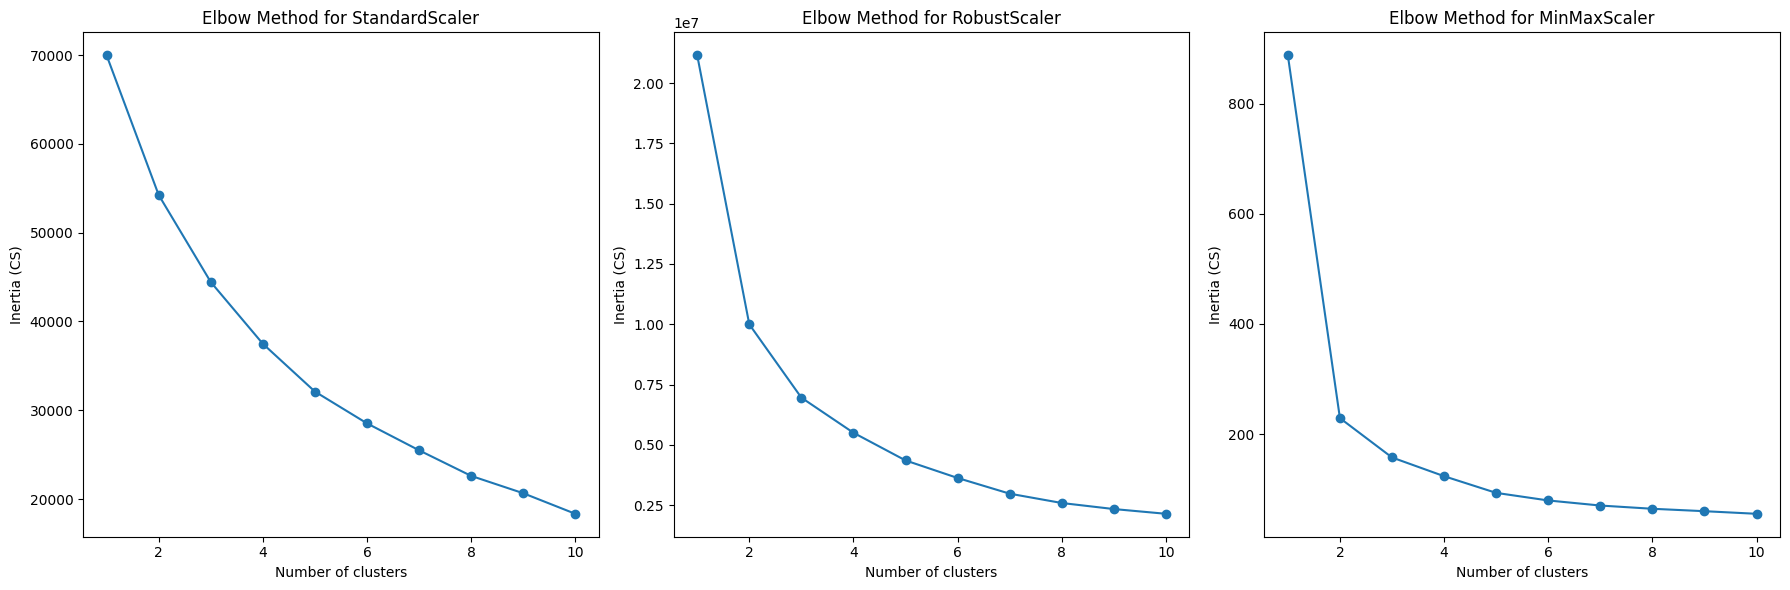

In [21]:
# Crear una lista para almacenar los valores de inercia (CS) para cada número de clusters
cs_standard = []
cs_robust = []
cs_minmax = []

# Rango de número de clusters (de 1 a 10)
num_clusters = range(1, 11)

# Aplicar KMeans para cada número de clusters y guardar el valor de inercia
for i in num_clusters:
    kmeans_standard = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=42)
    kmeans_standard.fit(dfX_standard)
    cs_standard.append(kmeans_standard.inertia_)

    kmeans_robust = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=42)
    kmeans_robust.fit(dfX_robust)
    cs_robust.append(kmeans_robust.inertia_)

    kmeans_minmax = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=42)
    kmeans_minmax.fit(dfX_minmax)
    cs_minmax.append(kmeans_minmax.inertia_)

# Graficar los resultados del método del codo en tres partes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Método StandardScaler
axes[0].plot(num_clusters, cs_standard, marker='o')
axes[0].set_title('Elbow Method for StandardScaler')
axes[0].set_xlabel('Number of clusters')
axes[0].set_ylabel('Inertia (CS)')

# Método RobustScaler
axes[1].plot(num_clusters, cs_robust, marker='o')
axes[1].set_title('Elbow Method for RobustScaler')
axes[1].set_xlabel('Number of clusters')
axes[1].set_ylabel('Inertia (CS)')

# Método MinMaxScaler
axes[2].plot(num_clusters, cs_minmax, marker='o')
axes[2].set_title('Elbow Method for MinMaxScaler')
axes[2].set_xlabel('Number of clusters')
axes[2].set_ylabel('Inertia (CS)')

plt.tight_layout()
plt.show()

Interpretació d'aquest gràfic indica que en el moment que es trenca la tendència pot ser un bon indicador del nombre de clústers per classificar les dades, ja podem observar que en els mètodes de pre-processament d'estandardització i robustesa no s'identifica clarament com podria ser el cas de maxmin scaler que en k=2 comença a trencar fins a k=5.

La interpretación a este gráfico indica que en el momento que se rompe la tendencia puede ser un buen indicador del número de clusters para clasificar los datos, ya podemos observar que en los métodos de preprocesado de standart y robust no se identifica cláramente como podría ser el caso de maxmin scaler que en k=2 empieza a romper hasta k=5.

The interpretation of this graph indicates that the point where the trend breaks can be a good indicator of the number of clusters for classifying the data. We can already observe that in the preprocessing methods of standardization and robustness, it's not clearly identified, unlike the case of MinMaxScaler, where at k=2 it starts to break and continues up to k=5.

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [29]:
# Definir una función para aplicar K-Means, evaluar la precisión y obtener la inercia
def kmeans_accuracy_inertia(X_scaled, scaler_name, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters,n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_

    correct_labels = sum(y == labels)
    accuracy = correct_labels / len(y)
    inertia = kmeans.inertia_

    print(f"Results for {scaler_name} with {num_clusters} clusters:")
    print("Correctly labeled samples:", correct_labels)
    print("Accuracy score:", accuracy)
    print("Inertia:", inertia)
    print("-" * 30)

# aplicar K-Means

for num_clusters in range(2, 8):
    kmeans_accuracy_inertia(dfX_standard, 'StandardScaler', num_clusters)

for num_clusters in range(2, 8):
    kmeans_accuracy_inertia(dfX_robust, 'RobustScaler', num_clusters)

for num_clusters in range(2, 8):
    kmeans_accuracy_inertia(dfX_minmax, 'MinMaxScaler', num_clusters)

Results for StandardScaler with 2 clusters:
Correctly labeled samples: 76
Accuracy score: 0.010858694099157023
Inertia: 54252.05208603125
------------------------------
Results for StandardScaler with 3 clusters:
Correctly labeled samples: 142
Accuracy score: 0.02028861265895128
Inertia: 44444.7160464806
------------------------------
Results for StandardScaler with 4 clusters:
Correctly labeled samples: 4239
Accuracy score: 0.6056579511358765
Inertia: 37490.495886151686
------------------------------
Results for StandardScaler with 5 clusters:
Correctly labeled samples: 165
Accuracy score: 0.02357479639948564
Inertia: 32104.87315834435
------------------------------
Results for StandardScaler with 6 clusters:
Correctly labeled samples: 287
Accuracy score: 0.04100585797971139
Inertia: 28523.81547533708
------------------------------
Results for StandardScaler with 7 clusters:
Correctly labeled samples: 201
Accuracy score: 0.0287183883411916
Inertia: 25488.325197674916
-----------------

La precisió reflexa com de bé el model ha agrupat correctament les dades, mentre que la inèrcia és una mesura de com es desvien els punts dels seus respectius centròids.

Els millors resultats obtinguts són:

- Results for StandardScaler with 4 clusters:

Correctly labeled samples: 4239

Accuracy score: 0.6056579511358765

Inertia: 37490.495886151686


- Results for RobustScaler with 5 clusters:

Correctly labeled samples: 4270

Accuracy score: 0.6100871553079011

Inertia: 4358503.9929311555

Tal com s'ha observat als gràfics, aquestes tècniques de pre-processament no ajuden massa a definir bé el model de KMeans, s'obté una precisió del 60% però amb una inèrcia molt elevada.
- Results for MinMaxScaler with 4 clusters:

Correctly labeled samples: 4316

Accuracy score: 0.6166595227889698

Inertia: 123.34665115358646

- Results for MinMaxScaler with 7 clusters:

Correctly labeled samples: 4105

Accuracy score: 0.5865123589084155

Inertia: 70.01336485938161

Amb MaxMinScaler s'obtenen dos resultats una mica millors que les altres tècniques pel que fa a la inèrcia. Però considerant la naturalesa de les dades i la variable resposta, és millor quedar-se amb el model de 4 clústers encara que tingui una inèrcia major que el de 7.

De totes maneres, aquest model no s'ajusta bé a les dades amb un 61% de precisió.

--------------------------------------------------------------------
La precisión refleja qué tan bien el modelo ha agrupado correctamente los datos, mientras que la inercia es una medida de cuánto se desvían los puntos de sus respectivos centroides.

Los mejores resultados obtenidos son:

- Results for StandardScaler with 4 clusters:

Correctly labeled samples: 4239

Accuracy score: 0.6056579511358765

Inertia: 37490.495886151686


- Results for RobustScaler with 5 clusters:

Correctly labeled samples: 4270

Accuracy score: 0.6100871553079011

Inertia: 4358503.9929311555

Tal y cómo se había visto en los gráficos estas técnicas de preprocesado no ayudan demasiado a definir bien el modelo de kmeans, se obtiene una accuracy de 60% pero con una incercia muy elevada.

- Results for MinMaxScaler with 4 clusters:

Correctly labeled samples: 4316

Accuracy score: 0.6166595227889698

Inertia: 123.34665115358646

- Results for MinMaxScaler with 7 clusters:

Correctly labeled samples: 4105

Accuracy score: 0.5865123589084155

Inertia: 70.01336485938161

Para MaxMinScaler se obtienen dos resutados, un poco mejores que las otras técnicas con respecto a la inercia. Pero considerando la naturaleza de los datos y la variable respuesta, es mejor quedarse con el modelo de 4 clusters aunque tenga mayor inercia que el de 7.

De todas maneras, este modelo no se ajusta bien a los datos con 61% de precisión.

-------------------------------------------------------------------
Accuracy reflects how well the model has correctly clustered the data, while inertia is a measure of how much the points deviate from their respective centroids.

The best results obtained are:

- Results for StandardScaler with 4 clusters:

Correctly labeled samples: 4239

Accuracy score: 0.6056579511358765

Inertia: 37490.495886151686


- Results for RobustScaler with 5 clusters:

Correctly labeled samples: 4270

Accuracy score: 0.6100871553079011

Inertia: 4358503.9929311555

As seen in the graphs, these preprocessing techniques don't contribute significantly to defining the KMeans model well; an accuracy of 60% is achieved, but with a high inertia.

- Results for MinMaxScaler with 4 clusters:

Correctly labeled samples: 4316

Accuracy score: 0.6166595227889698

Inertia: 123.34665115358646

- Results for MinMaxScaler with 7 clusters:

Correctly labeled samples: 4105

Accuracy score: 0.5865123589084155

Inertia: 70.01336485938161

For MaxMinScaler, two results are obtained that are slightly better than the other techniques in terms of inertia. However, considering the nature of the data and the response variable, it's better to stick with the 4-cluster model even though it has higher inertia than the 7-cluster one.

Nevertheless, this model doesn't fit the data well with 61% accuracy.

- Exercici 2

Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

- Ejercicio 2

Clasifica los diferentes registros utilizando el algoritmo de agrupación jerárquica.

- Exercise 2

Classify the different records using the hierarchical clustering algorithm.

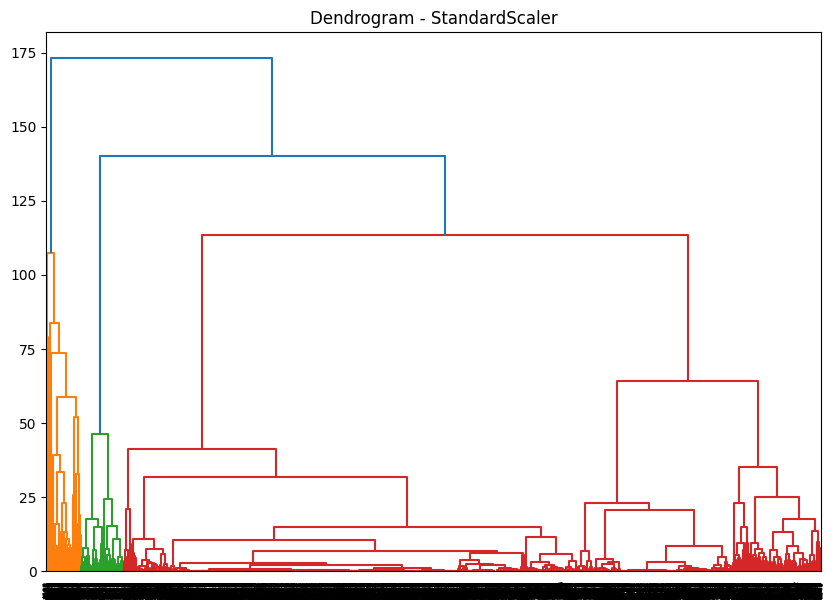

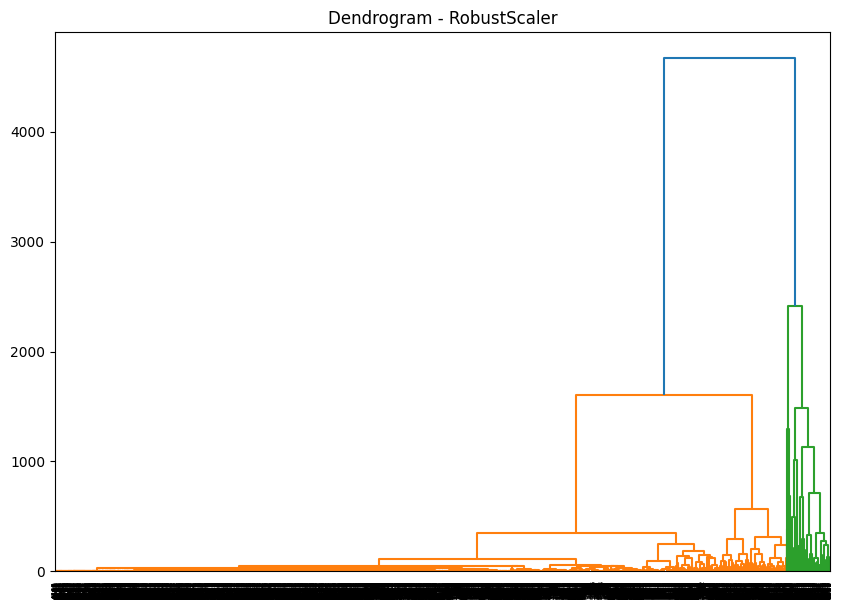

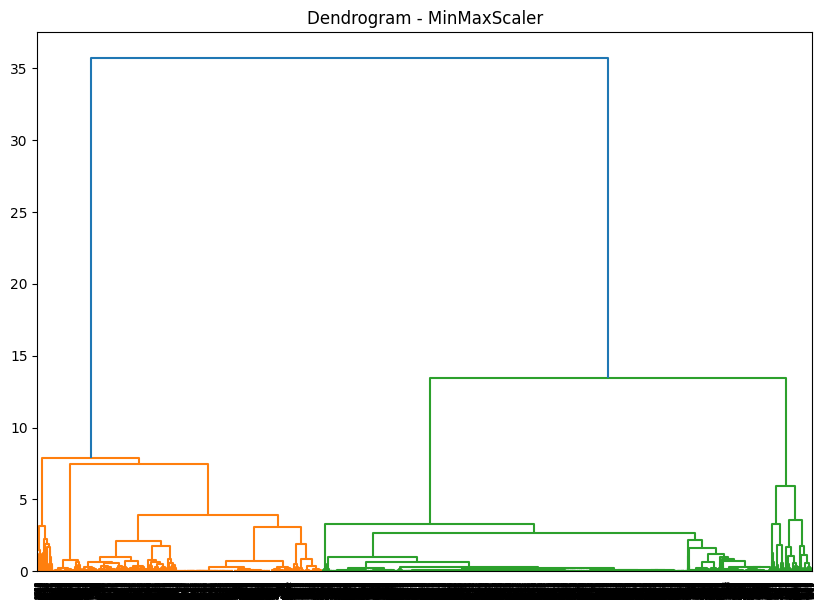

In [34]:
import scipy.cluster.hierarchy as shc

# Crear dendrogramas para cada método de preprocesamiento
plt.figure(figsize=(10, 7))
plt.title("Dendrogram - StandardScaler")
shc.dendrogram(shc.linkage(dfX_standard, method="ward"))
plt.show()

plt.figure(figsize=(10, 7))
plt.title("Dendrogram - RobustScaler")
shc.dendrogram(shc.linkage(dfX_robust, method="ward"))
plt.show()

plt.figure(figsize=(10, 7))
plt.title("Dendrogram - MinMaxScaler")
shc.dendrogram(shc.linkage(dfX_minmax, method="ward"))
plt.show()

Para interpretar el dendograma hay que decidir a qué altura del eje y (similitud) queremos dividir el conjunto de datos, obteniendo así el número de conglomerados obtendremos según su similitud o distancia entre ellos.
Para dividir hay que dibujar una linea horizontal a una altura que equilibre el número de conglomerados con la similitud.
 Así por ejemplo, para la técnica de stanrdard scaler se podría escoger un corte a la altura del valor 113 del eje y que daría como resultado 4 clases o conglomerados dando una similitud de un 35% aproximadamente.

 Para Robust, el corte parece oportuno ponerlo a la altura de 1500 obteniendo 4 clases o conglomerados y una similitud de 62% aproximadamente.

 Por último, para MinMax, a la altura de 7, con 5 conglomerados o clases y similitud del 80% aproximadamente.

- Exercici 3

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

- Ejercicio 3

Calcula el rendimiento del agrupamiento utilizando un parámetro como el coeficiente de silueta.

- Exercise 3

Calculate the clustering performance using a parameter such as the silhouette coefficient.


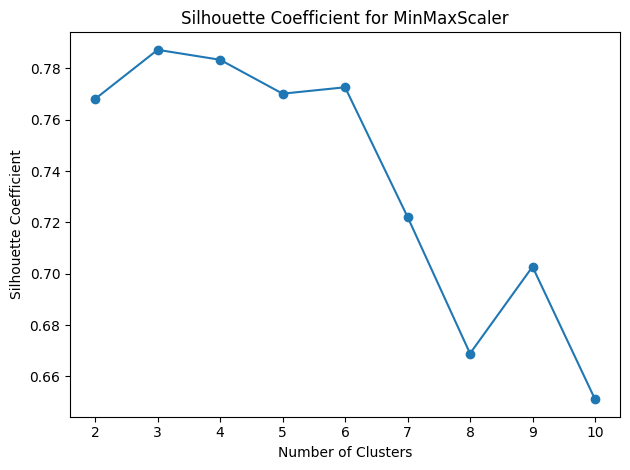

In [49]:
from sklearn.metrics import silhouette_score
n_clusters_range = range(2, 11)  # Rango de 2 a 10

# Calcular y graficar el coeficiente de silueta para MinMaxScaler
silhouette_coefficients = []

for k in n_clusters_range:
    kmeans = KMeans(n_clusters=k, init='random', max_iter=500, n_init=10, random_state=42)
    kmeans.fit(dfX_minmax)
    score = silhouette_score(dfX_minmax, kmeans.labels_)
    silhouette_coefficients.append(score)

# Graficar los resultados del coeficiente de silueta para MinMaxScaler
plt.plot(n_clusters_range, silhouette_coefficients, marker='o')
plt.title("Silhouette Coefficient for MinMaxScaler")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.xticks(n_clusters_range)
plt.tight_layout()
plt.show()

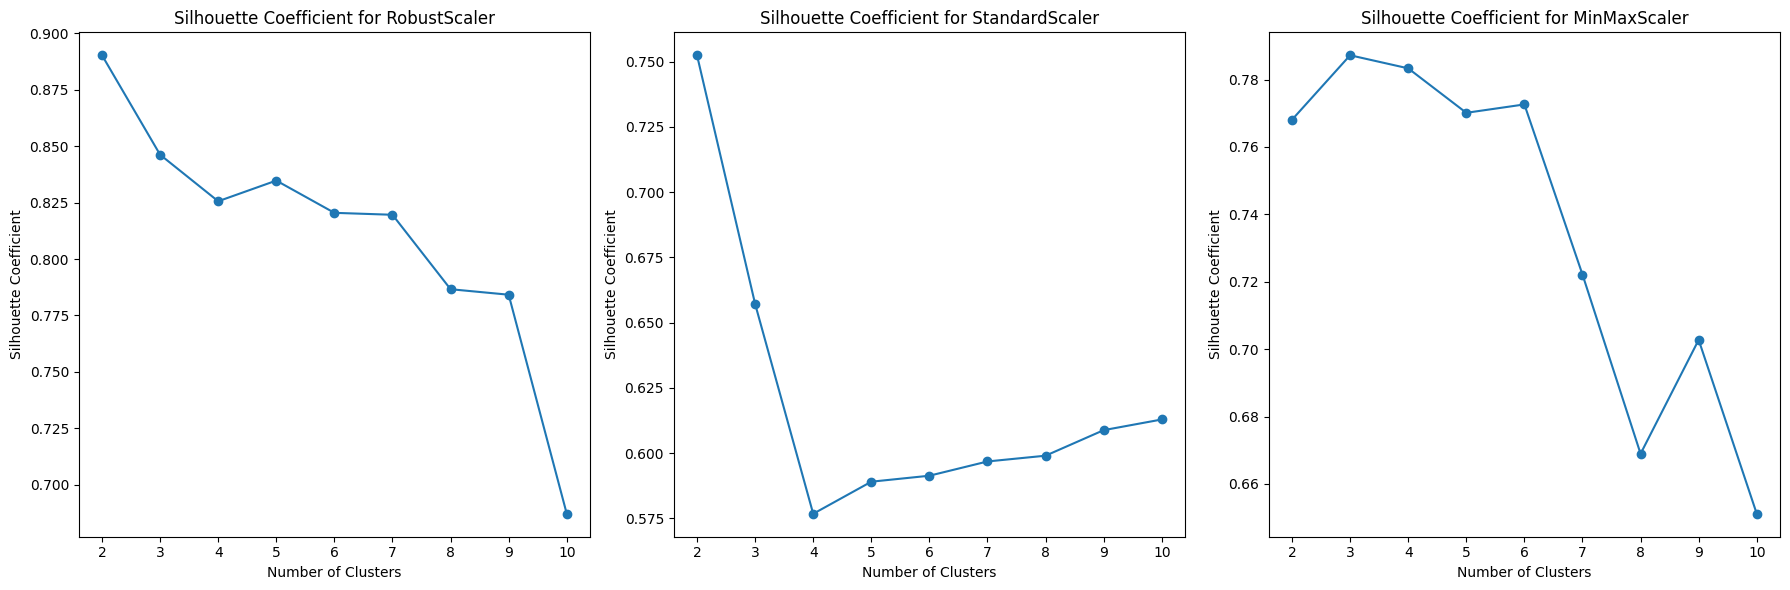

In [50]:
# Calcular y graficar el coeficiente de silueta
silhouette_coefficients_standard = []
silhouette_coefficients_robust = []
silhouette_coefficients_Minmax = []

for k in n_clusters_range:
    kmeans = KMeans(n_clusters=k, init='random', max_iter=500, n_init=10, random_state=42)
    kmeans.fit(dfX_standard)
    score = silhouette_score(dfX_standard, kmeans.labels_)
    silhouette_coefficients_standard.append(score)

    kmeans = KMeans(n_clusters=k, init='random', max_iter=500, n_init=10, random_state=42)
    kmeans.fit(dfX_robust)
    score = silhouette_score(dfX_robust, kmeans.labels_)
    silhouette_coefficients_robust.append(score)

    kmeans = KMeans(n_clusters=k, init='random', max_iter=500, n_init=10, random_state=42)
    kmeans.fit(dfX_minmax)
    score = silhouette_score(dfX_minmax, kmeans.labels_)
    silhouette_coefficients_Minmax.append(score)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Método RobustScaler
axes[0].plot(n_clusters_range, silhouette_coefficients_robust, marker='o', label='RobustScaler')
axes[0].set_title("Silhouette Coefficient for RobustScaler")
axes[0].set_xlabel("Number of Clusters")
axes[0].set_ylabel("Silhouette Coefficient")
axes[0].set_xticks(n_clusters_range)

# Método StandardScaler
axes[1].plot(n_clusters_range, silhouette_coefficients_standard, marker='o', label='StandardScaler')
axes[1].set_title("Silhouette Coefficient for StandardScaler")
axes[1].set_xlabel("Number of Clusters")
axes[1].set_ylabel("Silhouette Coefficient")
axes[1].set_xticks(n_clusters_range)

# Método MinMaxScaler
axes[2].plot(n_clusters_range, silhouette_coefficients, marker='o', label='MinMaxScaler')
axes[2].set_title("Silhouette Coefficient for MinMaxScaler")
axes[2].set_xlabel("Number of Clusters")
axes[2].set_ylabel("Silhouette Coefficient")
axes[2].set_xticks(n_clusters_range)

plt.tight_layout()
plt.show()

Per triar el millor punt cal trobar el punt amb el coeficient més alt que tingui context amb les dades.

Para escoger el mejor punto hay que encontrar el punto con el coeficientes más alto que tengan contexto con lo datos.

English: To choose the best point, you need to find the point with the highest coefficient that is contextually relevant to the data.

RobustScaler:

    Cluster 2: Silhouette Coefficient = 0.8903
    Cluster 3: Silhouette Coefficient = 0.8462

StandardScaler:

    Cluster 2: Silhouette Coefficient = 0.7525
    Cluster 3: Silhouette Coefficient = 0.6572

MinMaxScaler:

    Cluster 3: Silhouette Coefficient = 0.7872
    Cluster 4: Silhouette Coefficient = 0.7833

In [51]:
# Imprimir coeficientes de silueta y número de clusters para RobustScaler
for i, coef in enumerate(silhouette_coefficients_robust):
    print(f"RobustScaler - Cluster {i+2}: Silhouette Coefficient = {coef:.4f}")

# Imprimir coeficientes de silueta y número de clusters para StandardScaler
for i, coef in enumerate(silhouette_coefficients_standard):
    print(f"StandardScaler - Cluster {i+2}: Silhouette Coefficient = {coef:.4f}")

# Imprimir coeficientes de silueta y número de clusters para MinMaxScaler
for i, coef in enumerate(silhouette_coefficients):
    print(f"MinMaxScaler - Cluster {i+2}: Silhouette Coefficient = {coef:.4f}")

RobustScaler - Cluster 2: Silhouette Coefficient = 0.8903
RobustScaler - Cluster 3: Silhouette Coefficient = 0.8462
RobustScaler - Cluster 4: Silhouette Coefficient = 0.8256
RobustScaler - Cluster 5: Silhouette Coefficient = 0.8348
RobustScaler - Cluster 6: Silhouette Coefficient = 0.8205
RobustScaler - Cluster 7: Silhouette Coefficient = 0.8196
RobustScaler - Cluster 8: Silhouette Coefficient = 0.7866
RobustScaler - Cluster 9: Silhouette Coefficient = 0.7842
RobustScaler - Cluster 10: Silhouette Coefficient = 0.6871
StandardScaler - Cluster 2: Silhouette Coefficient = 0.7525
StandardScaler - Cluster 3: Silhouette Coefficient = 0.6572
StandardScaler - Cluster 4: Silhouette Coefficient = 0.5767
StandardScaler - Cluster 5: Silhouette Coefficient = 0.5890
StandardScaler - Cluster 6: Silhouette Coefficient = 0.5913
StandardScaler - Cluster 7: Silhouette Coefficient = 0.5968
StandardScaler - Cluster 8: Silhouette Coefficient = 0.5990
StandardScaler - Cluster 9: Silhouette Coefficient = 0.60